In [1]:
import numpy as np
import pandas as pd
import keras

In [2]:
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_X.shape

(60000, 28, 28)

In [4]:
test_X.shape

(10000, 28, 28)

In [5]:
type(train_X)

numpy.ndarray

In [6]:
np.isnan(train_y).sum()

0

In [7]:
np.isnan(train_X).sum()

0

In [8]:
train_X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
train_X[0].shape

(28, 28)

In [11]:
train_X.shape

(60000, 28, 28)

In [12]:
train_X = train_X.reshape(train_X.shape[0], -1)
train_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
train_X.shape

(60000, 784)

In [14]:
test_X = test_X.reshape(test_X.shape[0], -1)
test_X.shape

(10000, 784)

In [15]:
train_X[0].shape

(784,)

In [16]:
train_X[:, 0].shape

(60000,)

In [17]:
train_X = train_X.T
test_X = test_X.T

In [18]:
train_X = train_X/255.
test_X = test_X/255.

In [19]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
train_X[0].shape

(60000,)

In [21]:
import types
import h5py

In [39]:
import numpy as np
import h5py


class NeuralNetwork:
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        # Xavier Initialization for weights
        self.w1 = np.random.randn(hidden_size, input_size) * np.sqrt(1. / input_size)
        self.b1 = np.zeros((hidden_size, 1))
        self.w2 = np.random.randn(output_size, hidden_size) * np.sqrt(1. / hidden_size)
        self.b2 = np.zeros((output_size, 1))

    def relu(self, z):
        return np.maximum(0, z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)

    def compute_loss(self, y_true, y_pred):
        """Cross-Entropy Loss"""
        m = y_true.shape[1]
        loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m
        return loss

    def forward_propagation(self, X):
        """Forward pass"""
        self.z1 = np.dot(self.w1, X) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.w2, self.a1) + self.b2
        self.a2 = self.softmax(self.z2)

    def one_hot_encoding(self, y, num_classes=10):
        """One-hot encoding for labels"""
        one_hot_y = np.zeros((num_classes, y.size))
        one_hot_y[y, np.arange(y.size)] = 1
        return one_hot_y

    def derivative_relu(self, z):
        """Derivative of ReLU"""
        return z > 0

    def back_propagation(self, X, y_true):
        """Backward pass"""
        m = y_true.shape[1]

        # Gradients for output layer
        dz2 = self.a2 - y_true
        dw2 = (1 / m) * np.dot(dz2, self.a1.T)
        db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)

        # Gradients for hidden layer
        dz1 = np.dot(self.w2.T, dz2) * self.derivative_relu(self.z1)
        dw1 = (1 / m) * np.dot(dz1, X.T)
        db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

        return dw1, db1, dw2, db2

    def update_parameters(self, dw1, db1, dw2, db2, lr):
        """Update weights and biases using gradients"""
        self.w1 -= lr * dw1
        self.b1 -= lr * db1
        self.w2 -= lr * dw2
        self.b2 -= lr * db2

    def get_accuracy(self, predictions, y):
        return np.sum(predictions == y) / y.size

    def get_predictions(self, a2):
        return np.argmax(a2, axis=0)

    def fit(self, X, y, epochs, lr, batch_size=64):
        """Training loop with mini-batch gradient descent"""
        num_samples = X.shape[1]
        num_batches = num_samples // batch_size
        accuracies, losses = [], []

        y_one_hot = self.one_hot_encoding(y)

        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(num_batches):
                start = i * batch_size
                end = start + batch_size
                X_batch = X[:, start:end]
                y_batch = y_one_hot[:, start:end]

                # Forward and Backward Pass
                self.forward_propagation(X_batch)
                dw1, db1, dw2, db2 = self.back_propagation(X_batch, y_batch)
                self.update_parameters(dw1, db1, dw2, db2, lr)

                # Compute Batch Loss
                batch_loss = self.compute_loss(y_batch, self.a2)
                epoch_loss += batch_loss

            # Epoch Logging
            epoch_loss /= num_batches
            losses.append(epoch_loss)
            accuracy = self.get_accuracy(self.get_predictions(self.a2), y[start:end])
            accuracies.append(accuracy)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}")

        return accuracies, losses

    def predict(self, X):
        """Prediction"""
        self.forward_propagation(X)
        return self.get_predictions(self.a2)

    def evaluate_accuracy(self, X, y):
        """Evaluation"""
        predictions = self.predict(X)
        return self.get_accuracy(predictions, y)

    def save_model(self, filename, losses, accuracies):
        """Save model weights and metrics"""
        with h5py.File(filename, 'w') as f:
            f.create_dataset('w1', data=self.w1)
            f.create_dataset('b1', data=self.b1)
            f.create_dataset('w2', data=self.w2)
            f.create_dataset('b2', data=self.b2)
            f.create_dataset('losses', data=losses)
            f.create_dataset('accuracies', data=accuracies)

    def load_model(self, filename):
        """Load model weights and metrics"""
        with h5py.File(filename, 'r') as f:
            self.w1 = f['w1'][:]
            self.b1 = f['b1'][:]
            self.w2 = f['w2'][:]
            self.b2 = f['b2'][:]
            losses = f['losses'][:]
            accuracies = f['accuracies'][:]
        return accuracies, losses


In [40]:
nn = NeuralNetwork()

In [41]:
epochs = 17
lr = 0.01
accuracies, losses = nn.fit(train_X, train_y, epochs, lr)

Epoch 1/17, Loss: 0.9977, Accuracy: 0.7969
Epoch 2/17, Loss: 0.4447, Accuracy: 0.8906
Epoch 3/17, Loss: 0.3705, Accuracy: 0.9062
Epoch 4/17, Loss: 0.3365, Accuracy: 0.9062
Epoch 5/17, Loss: 0.3146, Accuracy: 0.9062
Epoch 6/17, Loss: 0.2980, Accuracy: 0.9062
Epoch 7/17, Loss: 0.2842, Accuracy: 0.9219
Epoch 8/17, Loss: 0.2721, Accuracy: 0.9219
Epoch 9/17, Loss: 0.2612, Accuracy: 0.9375
Epoch 10/17, Loss: 0.2513, Accuracy: 0.9375
Epoch 11/17, Loss: 0.2421, Accuracy: 0.9375
Epoch 12/17, Loss: 0.2337, Accuracy: 0.9375
Epoch 13/17, Loss: 0.2259, Accuracy: 0.9375
Epoch 14/17, Loss: 0.2185, Accuracy: 0.9375
Epoch 15/17, Loss: 0.2116, Accuracy: 0.9531
Epoch 16/17, Loss: 0.2051, Accuracy: 0.9531
Epoch 17/17, Loss: 0.1989, Accuracy: 0.9531


In [43]:
import os

model_folder = "/content/drive/MyDrive"
model_filename = "neural_network_model.h5"
model_path = os.path.join(model_folder, model_filename)

if not os.path.exists(model_folder):
    os.makedirs(model_folder)

nn.save_model(model_path, losses, accuracies)

print(f"Model saved successfully at {model_path}")

Model saved successfully at /content/drive/MyDrive/neural_network_model.h5


In [44]:
test_accuracy = nn.evaluate_accuracy(test_X, test_y)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9439


In [45]:
accuracies

[0.796875,
 0.890625,
 0.90625,
 0.90625,
 0.90625,
 0.90625,
 0.921875,
 0.921875,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.953125,
 0.953125,
 0.953125]

In [47]:
random_index_1 = 10
print(f"Value of random number: {test_y[random_index_1]}")

individual_sample = test_X[:, random_index_1].reshape(-1, 1)

# Get the prediction for the individual sample using the trained model
prediction = nn.predict(individual_sample)

# Print the predicted class label
print("Predicted Class Label:", prediction)

Value of random number: 0
Predicted Class Label: [0]


In [48]:
random_index_2 = 12
print(f"Value of random number: {test_y[random_index_2]}")

individual_sample = test_X[:, random_index_2].reshape(-1, 1)

# Get the prediction for the individual sample using the trained model
prediction = nn.predict(individual_sample)

# Print the predicted class label
print("Predicted Class Label:", prediction)

Value of random number: 9
Predicted Class Label: [9]


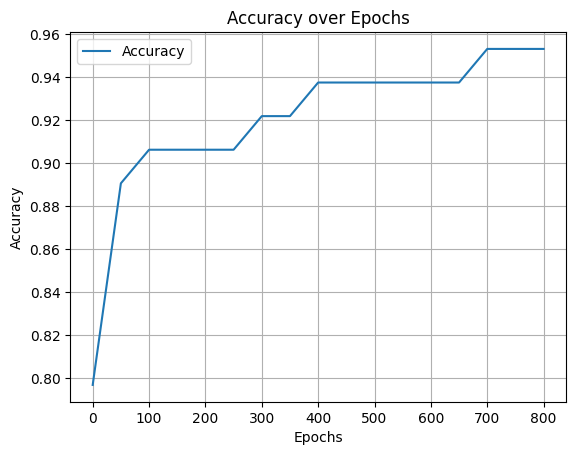

In [49]:
import matplotlib.pyplot as plt

epochs = len(accuracies)

x = list(range(0, epochs * 50, 50))

plt.plot(x, accuracies, label='Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')

plt.grid(True)
plt.legend()

plt.show()